In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file 
df = pd.read_csv("hotel_bookings.csv") 
# Display the first few rows
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [33]:
#Handling Missing Values

missing_values = df.isnull().sum()
print("Missing values in dataset:\n", missing_values[missing_values > 0])

Missing values in dataset:
 children         4
country        488
agent        16340
company     112593
dtype: int64


In [34]:
#children (4 missing values)
#Since the children column represents the number of children, missing values could be safely replaced with 0 
#(Assuming no children were present).

df['children'].fillna(0, inplace=True)

In [35]:
#country (488 missing values)
#The country column represents the country of origin of the guest.
#If it's missing, it likely means the data wasn’t provided during booking.
#We can replace missing values with "Unknown".

df['country'].fillna("Unknown", inplace=True)

In [36]:
#agent (16,340 missing values)
#The agent column contains IDs of booking agents.
#If it's missing, it likely means the booking was made directly.
#We can replace missing values with 0 (indicating no agent was used) and convert it to integer type.

df['agent'].fillna(0, inplace=True)
df['agent'] = df['agent'].astype(int)

In [37]:
#company (112,593 missing values)
#The company column contains IDs of companies making bulk bookings.
#If missing, it means the booking wasn’t linked to any company.
#We replace missing values with 0 and convert to integer type.

df['company'].fillna(0, inplace=True)
df['company'] = df['company'].astype(int)

In [38]:
#Final Check After Handling Missing Values

print("Missing values after handling:\n", df.isnull().sum().sum())

Missing values after handling:
 0


In [39]:
#Remove Duplicates
#Duplicate rows can cause misleading analysis, so let’s check and remove them.

#Count duplicate rows
duplicates = df.duplicated().sum()
print(f"Duplicate Rows Before Removal: {duplicates}")

# Remove duplicates
df.drop_duplicates(inplace=True)

# Verify after removal
print(f"Duplicate Rows After Removal: {df.duplicated().sum()}")

Duplicate Rows Before Removal: 31994
Duplicate Rows After Removal: 0


In [40]:
#Convert Date Columns
#Since the dataset contains a date column (reservation_status_date), we need to convert it to datetime format.

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [41]:
#These steps further enhance Business Analytics.
#New Feature: total_nights
#Why? It helps in room occupancy analysis. We can also analyze long stays vs. short stays.
#Useful for pricing strategies (e.g., offer discounts for longer stays).
#New Feature: total_nights

df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

In [42]:
#New Feature: is_family
#Why? It helps understand family travelers vs. solo travelers. Also Useful for marketing campaigns (e.g., family discounts).
#Can impact room preferences (families may need larger rooms).

df['is_family'] = (df['adults'] > 0) & ((df['children'] > 0) | (df['babies'] > 0))

In [43]:
#Detecting Outliers Using IQR
#The Interquartile Range (IQR) method helps identify extreme values based on percentiles:
#Q1 (25th percentile): The first quartile (lower 25% of data).
#Q3 (75th percentile): The third quartile (upper 25% of data).
#IQR = Q3 - Q1: The range where most data lies.
#Lower bound = Q1 - 1.5 * IQR
#Upper bound = Q3 + 1.5 * IQR
#Any value outside this range is considered an outlier.
# Define numerical columns to check for outliers


numerical_cols = ['lead_time', 'adr', 'stays_in_weekend_nights', 'stays_in_week_nights', 'total_nights']

# Dictionary to store outlier counts
outlier_info = {}

# Detect outliers using IQR method
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)  # 25th percentile
    Q3 = df[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range

    # Define outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
    
    # Store the count of outliers
    outlier_info[col] = outliers

# Display the number of outliers detected per column
print("Outlier counts per column:\n", outlier_info)

Outlier counts per column:
 {'lead_time': 2396, 'adr': 2490, 'stays_in_weekend_nights': 220, 'stays_in_week_nights': 1531, 'total_nights': 3015}


In [44]:
#Check Total Count of Entries in Each Column
#To see how many total values exist in each column
# Get total count of entries for each column

total_entries = df[numerical_cols].count()
print("Total entries per column:\n", total_entries)

Total entries per column:
 lead_time                  87396
adr                        87396
stays_in_weekend_nights    87396
stays_in_week_nights       87396
total_nights               87396
dtype: int64


In [45]:
from IPython.display import display
#Compare Total Entries vs. Outliers
#Now, let's compare the total count with the outlier count:

# Create a comparison dataframe
comparison_df = pd.DataFrame({
    "Total Entries": df[numerical_cols].count(),
    "Outlier Count": pd.Series(outlier_info),
    "Outlier Percentage": (pd.Series(outlier_info) / df[numerical_cols].count() * 100).round(2)
})

# Display the DataFrame
display(comparison_df)c

,Total Entries,Outlier Count,Outlier Percentage
lead_time,87396,2396,2.74
adr,87396,2490,2.85
stays_in_weekend_nights,87396,220,0.25
stays_in_week_nights,87396,1531,1.75
total_nights,87396,3015,3.45


In [46]:
#Check the Actual Outlier Values
#To decide whether to cap them, let’s check the actual values of outliers:

# Checking extreme values in numerical columns
for col in numerical_cols:
    print(f"Top 5 highest values in {col}:")
    print(df[col].nlargest(5))  # Show 5 highest values
    print("\n")

Top 5 highest values in lead_time:
1        737
4182     709
65231    629
65237    629
60173    626
Name: lead_time, dtype: int64


Top 5 highest values in adr:
48515     5400.0
111403     510.0
15083      508.0
103912     451.5
13142      450.0
Name: adr, dtype: float64


Top 5 highest values in stays_in_weekend_nights:
14038     19
14037     18
9839      16
33924     16
101794    16
Name: stays_in_weekend_nights, dtype: int64


Top 5 highest values in stays_in_week_nights:
14038     50
14037     42
101794    41
9839      40
33924     40
Name: stays_in_week_nights, dtype: int64


Top 5 highest values in total_nights:
14038     69
14037     60
101794    57
9839      56
33924     56
Name: total_nights, dtype: int64




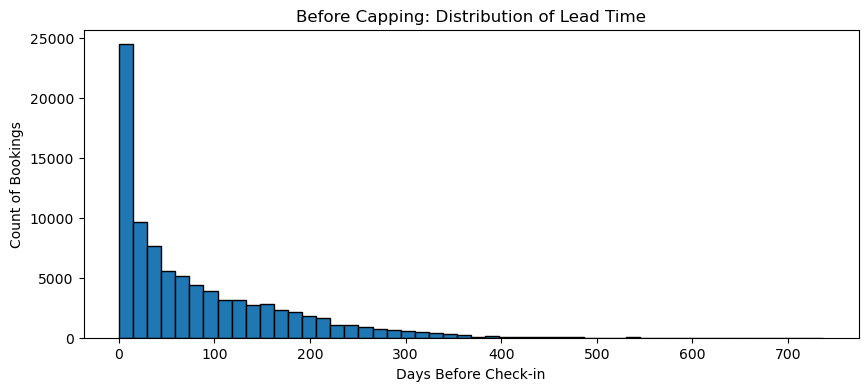

In [47]:
#lead_time (Days between booking & check-in)
#Max Value: 737 days (≈ 2 years in advance)
#Typical Range: Most bookings are much shorter (1-365 days) Real world industry standards.
#Decision: Lets check the frequency distribution and plot a histogram to visualize how lead times are distributed
#Why This Matters?
#If most values are below 365 days, then a cap of 365 days might be reasonable.
#If some values exceed 365 days but are rare, we should check percentiles.

# Plot histogram of lead time
plt.figure(figsize=(10, 4))
plt.hist(df['lead_time'], bins=50, edgecolor='black')
plt.title("Before Capping: Distribution of Lead Time")
plt.xlabel("Days Before Check-in")
plt.ylabel("Count of Bookings")
plt.show()

In [48]:
#Check Percentiles for Lead Time

# Show percentiles for lead_time
lead_time_percentiles = df['lead_time'].quantile([0.25, 0.5, 0.75, 0.90, 0.95, 0.99, 1])
print(lead_time_percentiles)

0.25     11.0
0.50     49.0
0.75    125.0
0.90    204.0
0.95    256.0
0.99    347.0
1.00    737.0
Name: lead_time, dtype: float64


In [49]:
#Should We Cap at 365 Days?
#99% of bookings have a lead time of 347 days or less
#Only 1% of bookings go beyond 347 days
#The absolute maximum is 737 days, which is very rare
#Decision: Cap at 365 days
#Since 99% of bookings are below 365 days, capping makes sense.
#Any booking above 365 days is an extreme case and unlikely to be useful for general trends.
#Most hotel platforms (e.g., Expedia, Booking.com) allow max 365 days in advance.

df['lead_time'] = np.where(df['lead_time'] > 365, 365, df['lead_time'])
print("Lead time capped at 365 days.")

Lead time capped at 365 days.


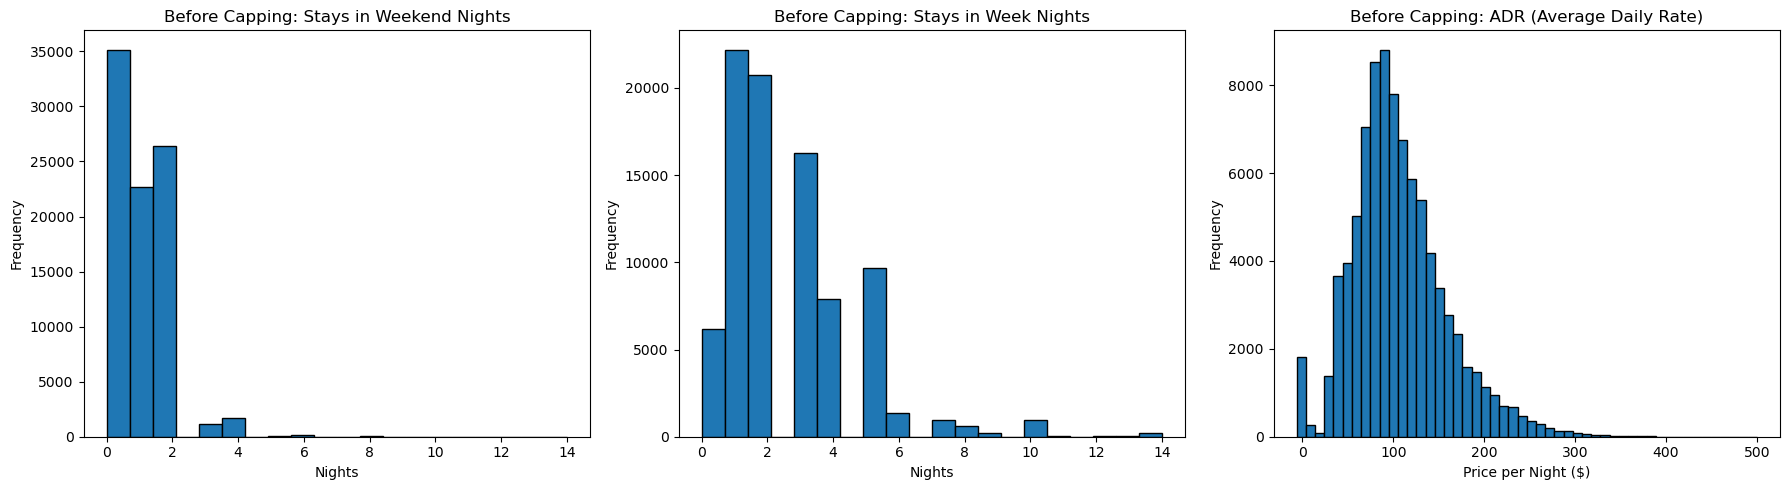

In [64]:
#adr (Average Daily Rate in $)
#Max Value: $5400 per night (next highest is $510, suggesting an anomaly)
#Typical Range: Most hotel ADRs are between $50 - $500.
#Decision: $5400 seems like a data entry error (likely an issue with bulk pricing or incorrect input).Capping ADR at $500
#Lets check the frequncy distribution

# Create subplots for visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Stays in weekend nights (before capping)
axes[0].hist(df['stays_in_weekend_nights'], bins=20, edgecolor='black')
axes[0].set_title("Before Capping: Stays in Weekend Nights")
axes[0].set_xlabel("Nights")
axes[0].set_ylabel("Frequency")

# Stays in week nights (before capping)
axes[1].hist(df['stays_in_week_nights'], bins=20, edgecolor='black')
axes[1].set_title("Before Capping: Stays in Week Nights")
axes[1].set_xlabel("Nights")
axes[1].set_ylabel("Frequency")

# ADR (Average Daily Rate) before capping
axes[2].hist(df['adr'], bins=50, edgecolor='black')
axes[2].set_title("Before Capping: ADR (Average Daily Rate)")
axes[2].set_xlabel("Price per Night ($)")
axes[2].set_ylabel("Frequency")

# Show the plots
plt.tight_layout()
plt.show()

In [63]:
# Show percentiles for stay durations
percentiles = df[['stays_in_weekend_nights', 'stays_in_week_nights', 'total_nights']].quantile([0.25, 0.5, 0.75, 0.90, 0.95, 0.99])
print(percentiles)

      stays_in_weekend_nights  stays_in_week_nights  total_nights
0.25                      0.0                   1.0           2.0
0.50                      1.0                   2.0           3.0
0.75                      2.0                   4.0           5.0
0.90                      2.0                   5.0           7.0
0.95                      2.0                   6.0           8.0
0.99                      4.0                  10.0          14.0


In [52]:
#What We Observed:
#The highest ADR is $5400 per night, which is 10× higher than the next values.
#The 99% percentile is much lower than $5400, suggesting that this value is an extreme outlier.
#The second highest values are $510, $508, and $451, which are reasonable for high-end hotels.

#90% of stays are ≤ 7 nights, meaning long-term stays are rare.
#99% of total stays are ≤ 14 nights, suggesting outliers beyond 14 nights are extreme cases.
#Since 99% of guests stay ≤ 14 nights, capping will prevent distortions in analysis.
#Long-term stays (15+ nights) are rare, and if not capped, could mislead trends like average booking length.

#We should cap adr based on the outlier analysis.
#$5400 is likely a data entry error or an extreme special case.
#Capping prevents distortions in financial metrics like average revenue per room.
#Hotels rarely charge $5000+ per night unless it's a luxury suite (which we should verify).
#Since the highest realistic value in the dataset is around $500, capping will remove extreme outliers while 
#keeping meaningful data.
#Decision: Cap ADR at $500

In [53]:
# Cap ADR at $500
df['adr'] = np.where(df['adr'] > 500, 500, df['adr'])

print("ADR capped at $500.")

ADR capped at $500.


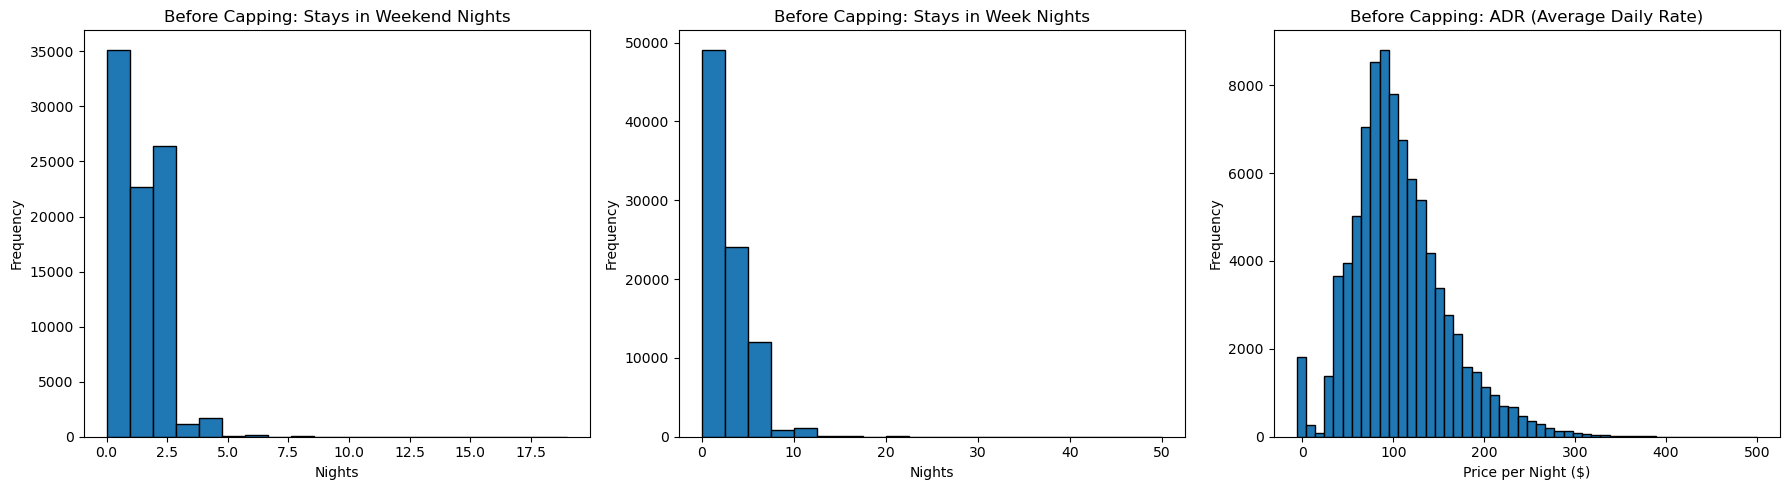

In [54]:
#stays_in_weekend_nights & stays_in_week_nights
#Max Values: 19 (weekend), 50 (weekday)
#Typical Range: Most guests stay 1-7 nights.
#Decision: 50 nights is extremely high, likely a special case (long-term stays).
#Capping at 14 nights (2 weeks) makes sense to align with normal booking behavior.
#Lets check frequency distribution

# Create subplots for visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Stays in weekend nights (before capping)
axes[0].hist(df['stays_in_weekend_nights'], bins=20, edgecolor='black')
axes[0].set_title("Before Capping: Stays in Weekend Nights")
axes[0].set_xlabel("Nights")
axes[0].set_ylabel("Frequency")

# Stays in week nights (before capping)
axes[1].hist(df['stays_in_week_nights'], bins=20, edgecolor='black')
axes[1].set_title("Before Capping: Stays in Week Nights")
axes[1].set_xlabel("Nights")
axes[1].set_ylabel("Frequency")

# ADR (Average Daily Rate) before capping
axes[2].hist(df['adr'], bins=50, edgecolor='black')
axes[2].set_title("Before Capping: ADR (Average Daily Rate)")
axes[2].set_xlabel("Price per Night ($)")
axes[2].set_ylabel("Frequency")

# Show the plots
plt.tight_layout()
plt.show()

In [55]:
# Calculate percentiles for stays before capping
percentiles_before_capping = df[['stays_in_weekend_nights', 'stays_in_week_nights']].quantile([0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

# Display the percentiles
print(percentiles_before_capping)

      stays_in_weekend_nights  stays_in_week_nights
0.25                      0.0                   1.0
0.50                      1.0                   2.0
0.75                      2.0                   4.0
0.90                      2.0                   5.0
0.95                      2.0                   6.0
0.99                      4.0                  10.0


In [56]:
# Cap stays at a maximum of 14 nights
df['stays_in_weekend_nights'] = np.where(df['stays_in_weekend_nights'] > 14, 14, df['stays_in_weekend_nights'])
df['stays_in_week_nights'] = np.where(df['stays_in_week_nights'] > 14, 14, df['stays_in_week_nights'])

print("Weekend and week night stays capped at 14 nights.")

Weekend and week night stays capped at 14 nights.


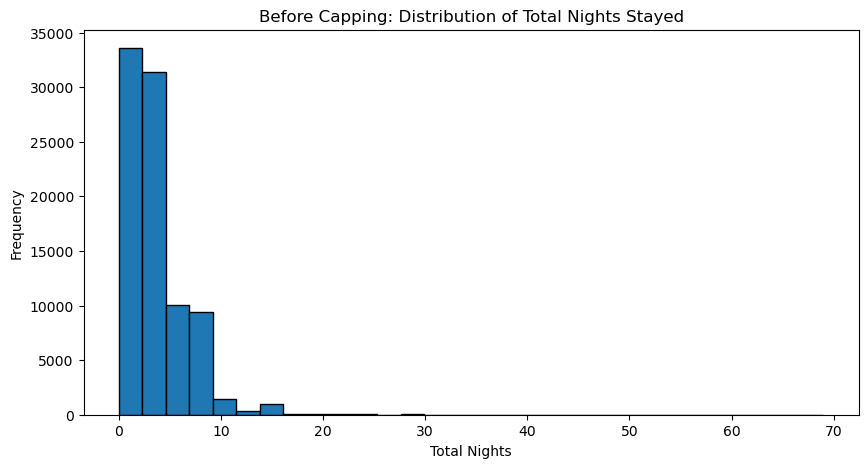

In [57]:
#total_nights (Total stay duration)
#Max Value: 69 nights
#Typical Range: Most hotel stays are 1-14 nights.
#Decision: Lets check the frequency distrubition

# Plot histogram for total nights before capping
plt.figure(figsize=(10, 5))
plt.hist(df['total_nights'], bins=30, edgecolor='black')
plt.title("Before Capping: Distribution of Total Nights Stayed")
plt.xlabel("Total Nights")
plt.ylabel("Frequency")
plt.show()

In [58]:
# Calculate percentiles for total_nights before capping
percentiles_total_nights = df['total_nights'].quantile([0.25, 0.50, 0.75, 0.90, 0.95, 0.99, 1])

# Display the percentiles
print(percentiles_total_nights)

0.25     2.0
0.50     3.0
0.75     5.0
0.90     7.0
0.95     8.0
0.99    14.0
1.00    69.0
Name: total_nights, dtype: float64


In [ ]:
#What We Observed:
#99% of bookings are 14 nights or less, meaning long stays beyond 14 nights are very rare.
#The maximum stay is 69 nights, but that’s an extreme case.
#Should We Cap total_nights?
#Yes
#Decision: Cap total_nights at 14, since 99% of stays are within this range.

In [59]:
# Cap total_nights at 14
df['total_nights'] = np.where(df['total_nights'] > 14, 14, df['total_nights'])

print("Total nights capped at 14.")

Total nights capped at 14.


In [60]:
# Check percentiles after capping
percentiles_after_capping = df[['lead_time','stays_in_weekend_nights', 'stays_in_week_nights', 'total_nights', 'adr']].quantile([0.25, 0.50, 0.75, 0.90, 0.95, 0.99])
print("Percentiles After Capping:\n", percentiles_after_capping)

Percentiles After Capping:
       lead_time  stays_in_weekend_nights  stays_in_week_nights  total_nights  \
0.25       11.0                      0.0                   1.0           2.0   
0.50       49.0                      1.0                   2.0           3.0   
0.75      125.0                      2.0                   4.0           5.0   
0.90      204.0                      2.0                   5.0           7.0   
0.95      256.0                      2.0                   6.0           8.0   
0.99      347.0                      4.0                  10.0          14.0   

          adr  
0.25   72.000  
0.50   98.100  
0.75  134.000  
0.90  174.000  
0.95  204.000  
0.99  261.405  


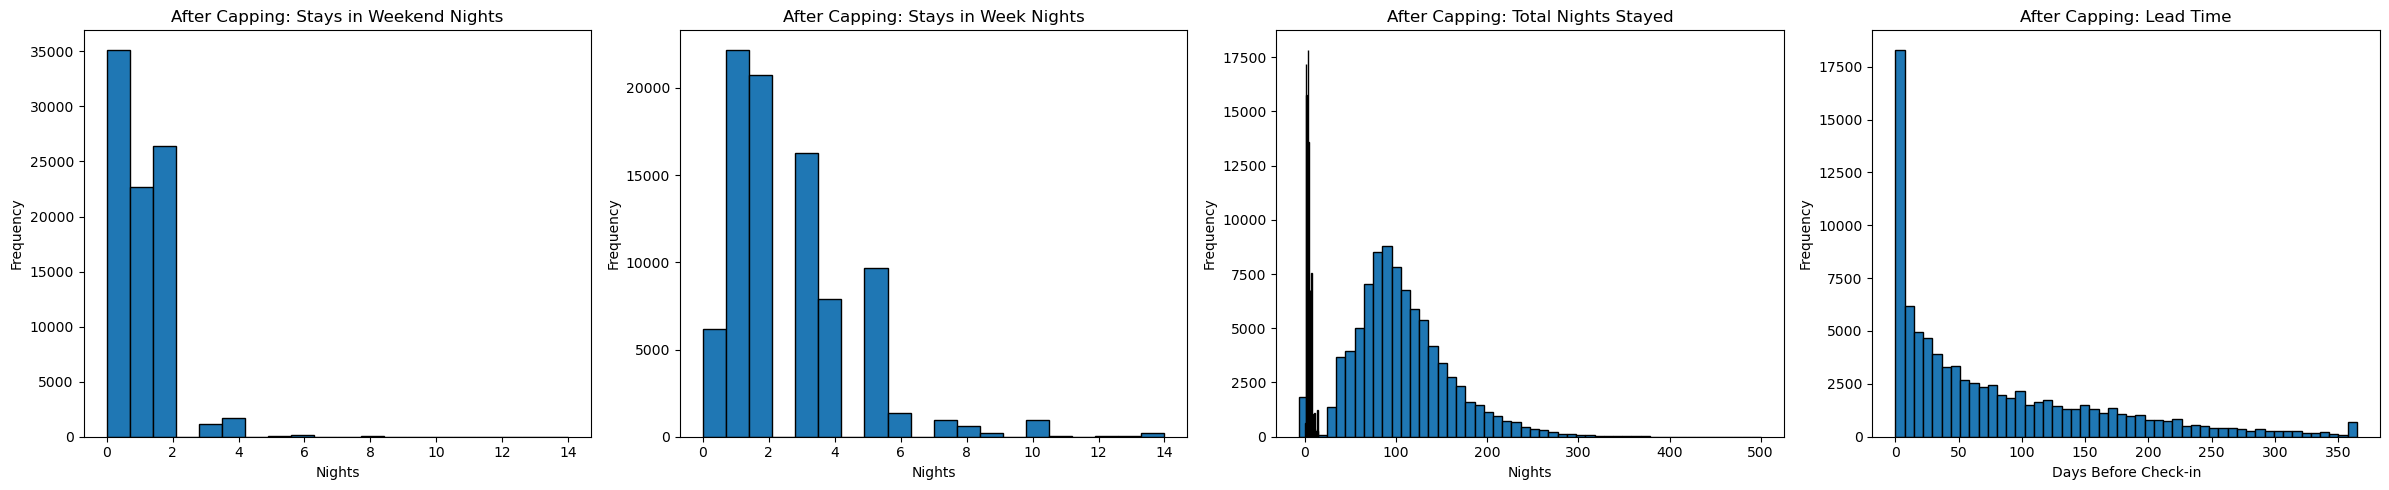

In [61]:
# Create subplots for visualization after capping
fig, axes = plt.subplots(1, 4, figsize=(24, 5))

# Lead time after capping
axes[3].hist(df['lead_time'], bins=50, edgecolor='black')
axes[3].set_title("After Capping: Lead Time")
axes[3].set_xlabel("Days Before Check-in")
axes[3].set_ylabel("Frequency")

# ADR (Average Daily Rate) after capping
axes[2].hist(df['adr'], bins=50, edgecolor='black')
axes[2].set_title("After Capping: ADR (Average Daily Rate)")
axes[2].set_xlabel("Price per Night ($)")
axes[2].set_ylabel("Frequency")

# Stays in weekend nights (after capping)
axes[0].hist(df['stays_in_weekend_nights'], bins=20, edgecolor='black')
axes[0].set_title("After Capping: Stays in Weekend Nights")
axes[0].set_xlabel("Nights")
axes[0].set_ylabel("Frequency")

# Stays in week nights (after capping)
axes[1].hist(df['stays_in_week_nights'], bins=20, edgecolor='black')
axes[1].set_title("After Capping: Stays in Week Nights")
axes[1].set_xlabel("Nights")
axes[1].set_ylabel("Frequency")

# Total night stays (after capping)
axes[2].hist(df['total_nights'], bins=20, edgecolor='black')
axes[2].set_title("After Capping: Total Nights Stayed")
axes[2].set_xlabel("Nights")
axes[2].set_ylabel("Frequency")

# Adjust layout and display plots
plt.tight_layout()
plt.show()